In [15]:
#LOAD AND PROCESS DATASET
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load dataset
data=load_breast_cancer()
X,y=data.data,data.target

#split and scale

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [35]:
#Train Bagging,AdaBoost and Gradient Boosting models
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#Bagging
bagging=BaggingClassifier(RandomForestClassifier(),n_estimators=50,random_state=42)
bagging.fit(X_train_scaled,y_train)
bagging_acc=accuracy_score(y_test,bagging.predict(X_test_scaled))

#AdaBoost
ada = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)
ada.fit(X_train_scaled,y_train)
ada_acc=accuracy_score(y_test,ada.predict(X_test_scaled))

#Gradient Boosting
gb=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
gb.fit(X_train_scaled,y_train)
gb_acc=accuracy_score(y_test,gb.predict(X_test_scaled))

#XgBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled,y_train)
xgb_acc=accuracy_score(y_test,xgb.predict(X_test_scaled))


import pandas as pd
results_df=pd.DataFrame({
    "Model":["Bagging","AdaBoost","Gradient Boosting","XGBoosting"],
    "Accuracy":[bagging_acc,ada_acc,gb_acc,xgb_acc]
})
results_df


          

,Model,Accuracy
0,Bagging,0.964912
1,AdaBoost,0.964912
2,Gradient Boosting,0.956140
3,XGBoosting,0.956140


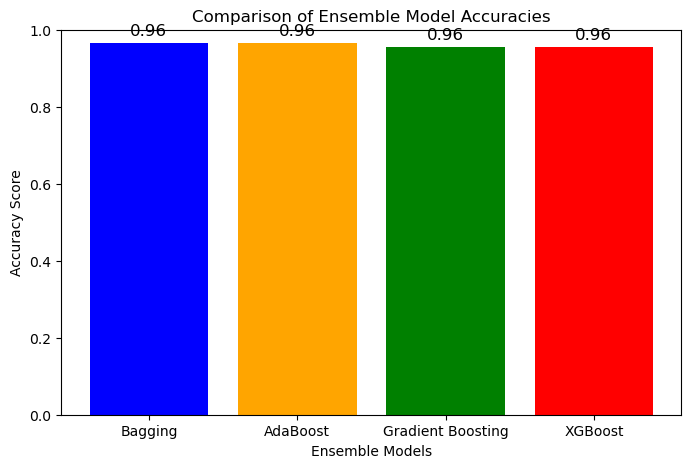

In [38]:
import matplotlib.pyplot as plt
models = ['Bagging', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
accuracies = [bagging_acc, ada_acc, gb_acc, xgb_acc]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])

# Adding labels and title
plt.xlabel('Ensemble Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('Comparison of Ensemble Model Accuracies')

# Display accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.show()